# Caldero Solver

## Formula

Deonte by $d$ the number of diplomas you have
$$
\begin{align*}
E_i(\alpha) & = \max\left\{\sum_{j=1}^{12}\alpha_j v_{i,j},0\right\}
\; 1.1^{\sum_{j=1}^{12}\alpha_j b_{i,j}},\\
\hat{E}_i(\alpha)&= 20\,\frac{E_i(\alpha)}{\sum_{k=1}^{d}E_k(\alpha)}\sqrt{\sum_{j=1}^{12}\alpha_j},\\
F(\alpha)&=\sum_{i=1}^{d} w_i\,\hat{E}_i(\alpha),
\end{align*}
$$
where $W=(v_{i,j}),B=(b_{i,j})\in\mathbb{R}^{d\times 12}$ are constant values, $w=(w_i)\in[0,1]^d$ is the weights(interest) in the $i$-effect. and $\alpha \in \{\alpha \in \mathbb{Z}_{26}: |\alpha|\leq 25\}$ are the number of ingredients. 

In [10]:
import numpy as np
import pandas as pd


pd.set_option("display.max_columns", None)

In [11]:
EFFECT_NAMES = [
    "Monedas",
    "Provisiones",
    "Cuartel Fuerza",
    "Ordinarios Básicos",
    "Ordinarios Refinados",
    "Ordinarios Preciosos",
    "Entrenamiento Fuerza",
    "Portal",
    "Orcos",
    "Maná",
    "Mercenarios Fuerza",
    "Semillas",
    "Sensitivos Básicos",
    "Sensitivos Refinados",
    "Sensitivos Preciosos",
    "Entrenamiento Salud",
    "Mercenarios Salud",
    "Unurium",
    "Ascendidos Básicos",
    "Ascendidos Refinados",
    "Ascendidos Preciosos",
    "Cuartel Salud",
    "Trabajo Comunitario",
    "Productos en Conserva",
]


B = pd.read_csv('cauldron_optimizer/optimizer/B_values.csv')
V = pd.read_csv('cauldron_optimizer/optimizer/V_values.csv')
B.index = EFFECT_NAMES
V.index = EFFECT_NAMES
B.T

,Monedas,Provisiones,Cuartel Fuerza,Ordinarios Básicos,Ordinarios Refinados,Ordinarios Preciosos,Entrenamiento Fuerza,Portal,Orcos,Maná,Mercenarios Fuerza,Semillas,Sensitivos Básicos,Sensitivos Refinados,Sensitivos Preciosos,Entrenamiento Salud,Mercenarios Salud,Unurium,Ascendidos Básicos,Ascendidos Refinados,Ascendidos Preciosos,Cuartel Salud,Trabajo Comunitario,Productos en Conserva
Espora,0,1,-1,0,2,-2,0,0,1,0,0,0,0,0,0,1,-1,2,0,0,0,1,-2,0
Escarabanuez,0,1,-2,0,1,0,2,0,-1,0,0,0,0,1,-1,0,0,0,1,-2,2,0,0,0
Cascaron de Mana,0,-1,0,0,1,0,1,0,-2,2,0,0,0,0,0,2,1,0,0,0,0,1,-1,-2
Iris,0,-2,0,0,-1,0,1,2,0,1,0,0,-2,2,1,0,0,0,1,-1,0,0,0,0
Huevo,0,0,0,2,-2,0,-1,1,0,1,0,0,0,0,0,0,1,-2,0,0,0,2,1,-1
Lima,0,0,0,1,0,0,-2,1,0,-1,2,0,-1,0,1,0,0,0,2,1,-2,0,0,0
Flor de hierba mora,0,0,0,1,0,0,0,-1,0,-2,1,2,0,0,0,-2,2,-1,0,0,0,0,1,1
Lenguas,2,0,0,-1,0,0,0,-2,0,0,1,1,1,-2,2,0,0,0,0,1,-1,0,0,0
Brote ocular,1,0,0,-2,0,2,0,0,-1,0,-1,1,0,0,0,-1,0,1,0,0,0,-2,2,1
Hoja,1,0,2,0,0,1,0,0,0,0,-2,-1,1,-1,0,0,0,0,-2,2,1,0,0,0


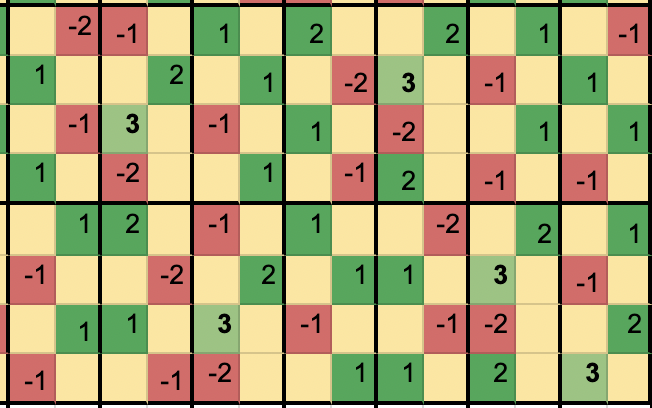

In [12]:
V.T

,Monedas,Provisiones,Cuartel Fuerza,Ordinarios Básicos,Ordinarios Refinados,Ordinarios Preciosos,Entrenamiento Fuerza,Portal,Orcos,Maná,Mercenarios Fuerza,Semillas,Sensitivos Básicos,Sensitivos Refinados,Sensitivos Preciosos,Entrenamiento Salud,Mercenarios Salud,Unurium,Ascendidos Básicos,Ascendidos Refinados,Ascendidos Preciosos,Cuartel Salud,Trabajo Comunitario,Productos en Conserva
Espora,3,0,0,1,0,0,-2,-1,0,-1,1,2,3,-1,1,0,0,0,1,2,-1,-2,0,-2
Escarabanuez,2,0,0,-1,0,3,0,-1,0,-2,1,1,-2,0,0,-1,1,3,0,0,0,2,-1,2
Cascaron de Mana,1,0,3,-1,0,2,0,-2,0,0,-1,1,2,-1,1,0,0,-2,-1,1,3,-1,0,0
Iris,1,0,2,-2,0,1,0,0,3,0,-1,-1,0,0,0,3,-1,2,0,0,-2,1,-2,1
Huevo,-1,3,1,0,0,1,0,0,2,0,-2,-1,1,3,-1,-2,0,0,-1,1,2,-1,0,0
Lima,-1,2,1,0,3,-1,0,0,1,0,0,-2,0,-2,0,2,-1,1,0,0,0,1,3,1
Flor de hierba mora,-2,1,-1,0,2,-1,3,0,1,0,0,0,1,2,-1,0,0,0,3,-1,1,0,-1,0
Lenguas,0,1,-1,0,1,-2,2,0,-1,3,0,0,0,0,0,1,3,1,-2,0,0,-1,2,-1
Brote ocular,0,-1,-2,0,1,0,1,3,0,2,0,0,-1,1,3,0,-2,0,2,-1,1,0,0,0
Hoja,0,-1,0,3,-1,0,1,2,-2,1,0,0,0,0,-2,1,2,-1,0,0,0,-1,1,-1


In [13]:
# # example index names
# row_a = "Cuartel Salud"
# row_b = "Trabajo Comunitario"

# B.loc[[row_a, row_b]] = B.loc[[row_b, row_a]].values
# V.loc[[row_a, row_b]] = V.loc[[row_b, row_a]].values

In [14]:
# B.to_csv('cauldron_optimizer/optimizer/B_values.csv',index=False)
# V.to_csv('cauldron_optimizer/optimizer/V_values.csv',index=False)

In [15]:

from cauldron_optimizer.optimizer.optimizer import CauldronOptimizer
from cauldron_optimizer.constants import EFFECT_NAMES
n_diplomas = 23
opt = CauldronOptimizer(
	effect_weights=n_diplomas*[1],
	premium_ingr=[],
	alpha_UB=11,
	prob_UB=20,
)

## Test

In [16]:
alpha_best = np.array([[0,0,0,0],
                       [0,0,0,0],
                       [0,0,1,1]])
alpha_best

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 1]])

In [17]:
out_effects = opt.effect_probabilities(alpha_best.flatten())
order = np.argsort(out_effects)[::-1]

In [18]:
for i in order:
    effect_prob = out_effects[i]
    if effect_prob > 0.0:
        print(f"{EFFECT_NAMES[i]}: {effect_prob:.2f}%")

Mercenarios Fuerza: 6.83%
Ordinarios Básicos: 4.10%
Cuartel Salud: 3.73%
Semillas: 3.39%
Portal: 2.73%
Sensitivos Preciosos: 2.26%
Sensitivos Refinados: 1.50%
Ascendidos Refinados: 1.37%
Ascendidos Básicos: 1.24%
Mercenarios Salud: 1.13%


<!-- Cuartel Salud: 21.21%
Cuartel Fuerza: 20.68%
Sensitivos Básicos: 18.11%
Entrenamiento Salud: 8.25%
Ascendidos Preciosos: 7.39%
Semillas: 7.37%
Provisiones: 4.50%
Mercenarios Fuerza: 3.19%
Mercenarios Salud: 1.59%
Sensitivos Preciosos: 1.56%
Ordinarios Preciosos: 1.14%
Ordinarios Refinados: 1.06%
Trabajo Comunitario: 0.80%
Monedas: 0.73%
Orcos: 0.40% -->